In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

SEED = 42

In [4]:
import sys
sys.path.append("utils")
from train_utils import *
from data_processing import get_preprocessed_dataset

#### Dataset

In [12]:
%%time
dataset = get_preprocessed_dataset()

process members...
process songs...
process songs extra info...
merge songs...
process train...


100%|██████████| 3/3 [00:00<00:00, 55.58it/s]


merge train...
get final dataset...



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 36s, sys: 3.72 s, total: 1min 40s
Wall time: 1min 44s


In [13]:
### check reproducibility

restored = pd.read_pickle("full_extended_train_df.pkl")
assert restored.equals(dataset)
del restored

In [5]:
# TRAIN_DATASET = TrainDataset(restored[:50_000])
TRAIN_DATASET = TrainDataset(restored[:1_000])
# TRAIN_DATASET = TrainDataset(restored)

TRAIN_DATASET._df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,gender,registered_via,age_group,...,artist_name,composer,lyricist,language,genre_ids_count,artist_name_count,composer_count,lyricist_count,isrc_country,isrc_year
3743055,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,DZanD98cLDbuPBiXONSwLFSw8BfI69ErQS23vYJ9UU4=,my library,Local playlist more,local-library,1,13,male,9,normal,...,南拳媽媽,周杰倫,宋健彰,3.0,1,1,1,1,"Taiwan, Province of China",2008
2028065,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,E6Fm873UEDPv0LATidt2gKwBZZHww2Q04nxTg15N9iE=,my library,Local playlist more,local-library,1,13,male,9,normal,...,張靚穎 (Jane Zhang),張靚穎,沈松,3.0,1,1,1,1,-1,-1
785721,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0TZ4BKn9YES2upK9ZgKgsAUtUClVKHnct79pnA/iPiQ=,my library,Local playlist more,local-library,1,13,male,9,normal,...,Linkin Park,FILL_NAN,FILL_NAN,52.0,1,1,0,0,United States,2003
785720,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,m2YSjnhR3nzx/2WccNYpGWywohyd8fT0xR+skQC9/JQ=,my library,Local playlist more,local-library,1,13,male,9,normal,...,Linkin Park,FILL_NAN,FILL_NAN,52.0,1,1,0,0,United States,2007
2973176,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,cXpk2ZXiSgkwGo8iGbswBc0lzucL9AH+j/2khmnmOLI=,my library,Local playlist more,local-playlist,0,13,male,9,normal,...,Starset,FILL_NAN,FILL_NAN,52.0,1,1,0,0,United States,2014


#### CatBoost

In [6]:
%%time
catboost_model = CatBoostModel(loss_function="YetiRank", 
                                 iterations=150, 
                                 task_type="CPU", 
                                 random_state=SEED)

catboost_auc_per_query = get_metric(catboost_model, TRAIN_DATASET, n_splits=5)

--- Split: 1/5 ---
Groupwise loss function. OneHotMaxSize set to 10
0:	total: 60.3ms	remaining: 8.98s
1:	total: 64.4ms	remaining: 4.76s
2:	total: 67.8ms	remaining: 3.32s
3:	total: 71ms	remaining: 2.59s
4:	total: 74.1ms	remaining: 2.15s
5:	total: 77.2ms	remaining: 1.85s
6:	total: 80.4ms	remaining: 1.64s
7:	total: 83.4ms	remaining: 1.48s
8:	total: 86.6ms	remaining: 1.36s
9:	total: 89.7ms	remaining: 1.25s
10:	total: 92.8ms	remaining: 1.17s
11:	total: 96ms	remaining: 1.1s
12:	total: 99ms	remaining: 1.04s
13:	total: 102ms	remaining: 993ms
14:	total: 105ms	remaining: 947ms
15:	total: 109ms	remaining: 910ms
16:	total: 112ms	remaining: 878ms
17:	total: 115ms	remaining: 846ms
18:	total: 118ms	remaining: 816ms
19:	total: 122ms	remaining: 791ms
20:	total: 125ms	remaining: 767ms
21:	total: 128ms	remaining: 745ms
22:	total: 131ms	remaining: 724ms
23:	total: 134ms	remaining: 705ms
24:	total: 137ms	remaining: 687ms
25:	total: 140ms	remaining: 670ms
26:	total: 144ms	remaining: 655ms
27:	total: 147ms	r

89:	total: 802ms	remaining: 534ms
90:	total: 811ms	remaining: 526ms
91:	total: 820ms	remaining: 517ms
92:	total: 829ms	remaining: 508ms
93:	total: 838ms	remaining: 499ms
94:	total: 847ms	remaining: 490ms
95:	total: 856ms	remaining: 481ms
96:	total: 864ms	remaining: 472ms
97:	total: 872ms	remaining: 463ms
98:	total: 881ms	remaining: 454ms
99:	total: 890ms	remaining: 445ms
100:	total: 898ms	remaining: 436ms
101:	total: 907ms	remaining: 427ms
102:	total: 915ms	remaining: 418ms
103:	total: 924ms	remaining: 409ms
104:	total: 933ms	remaining: 400ms
105:	total: 942ms	remaining: 391ms
106:	total: 950ms	remaining: 382ms
107:	total: 959ms	remaining: 373ms
108:	total: 967ms	remaining: 364ms
109:	total: 976ms	remaining: 355ms
110:	total: 984ms	remaining: 346ms
111:	total: 993ms	remaining: 337ms
112:	total: 1s	remaining: 328ms
113:	total: 1.01s	remaining: 319ms
114:	total: 1.02s	remaining: 310ms
115:	total: 1.03s	remaining: 301ms
116:	total: 1.04s	remaining: 292ms
117:	total: 1.04s	remaining: 283ms

45:	total: 401ms	remaining: 906ms
46:	total: 410ms	remaining: 899ms
47:	total: 422ms	remaining: 897ms
48:	total: 431ms	remaining: 889ms
49:	total: 440ms	remaining: 879ms
50:	total: 448ms	remaining: 870ms
51:	total: 457ms	remaining: 861ms
52:	total: 465ms	remaining: 852ms
53:	total: 474ms	remaining: 842ms
54:	total: 482ms	remaining: 833ms
55:	total: 491ms	remaining: 824ms
56:	total: 499ms	remaining: 815ms
57:	total: 508ms	remaining: 806ms
58:	total: 516ms	remaining: 797ms
59:	total: 525ms	remaining: 787ms
60:	total: 534ms	remaining: 778ms
61:	total: 542ms	remaining: 769ms
62:	total: 550ms	remaining: 760ms
63:	total: 558ms	remaining: 750ms
64:	total: 567ms	remaining: 741ms
65:	total: 575ms	remaining: 732ms
66:	total: 584ms	remaining: 723ms
67:	total: 592ms	remaining: 714ms
68:	total: 602ms	remaining: 706ms
69:	total: 612ms	remaining: 699ms
70:	total: 621ms	remaining: 691ms
71:	total: 630ms	remaining: 682ms
72:	total: 638ms	remaining: 673ms
73:	total: 647ms	remaining: 664ms
74:	total: 655

143:	total: 1.42s	remaining: 59ms
144:	total: 1.43s	remaining: 49.2ms
145:	total: 1.44s	remaining: 39.4ms
146:	total: 1.46s	remaining: 29.8ms
147:	total: 1.48s	remaining: 20.1ms
148:	total: 1.5s	remaining: 10.1ms
149:	total: 1.52s	remaining: 0us
CPU times: user 22.2 s, sys: 1.33 s, total: 23.5 s
Wall time: 13.9 s


In [7]:
catboost_auc_per_query

,AUC_per_query
split: 1,0.486187
split: 2,0.448739
split: 3,0.620683
split: 4,0.846759
split: 5,0.066667
avg,0.493807


#### Embeddings

In [11]:
%%time
embedding_model = EmbeddingModel(embedding_dim=100, random_state=SEED)

embedding_auc_per_query = get_metric(embedding_model, TRAIN_DATASET, n_splits=5)

--- Split: 1/5 ---
Fit items...


Fit users: 100%|██████████| 30755/30755 [00:00<00:00, 171223.92it/s]


--- Split: 2/5 ---
Fit items...


Fit users: 100%|██████████| 30755/30755 [00:00<00:00, 185723.88it/s]


--- Split: 3/5 ---
Fit items...


Fit users: 100%|██████████| 30755/30755 [00:00<00:00, 157958.45it/s]


--- Split: 4/5 ---
Fit items...


Fit users: 100%|██████████| 30755/30755 [00:00<00:00, 198021.29it/s]


--- Split: 5/5 ---
Fit items...


Fit users: 100%|██████████| 30755/30755 [00:00<00:00, 192272.51it/s]

CPU times: user 21.4 s, sys: 690 ms, total: 22.1 s
Wall time: 21.3 s


In [12]:
embedding_auc_per_query

,AUC_per_query
split: 1,0.5
split: 2,0.5
split: 3,0.5
split: 4,0.5
split: 5,0.5
avg,0.5


#### Embeddings + CatBoost

In [13]:
%%time
stack_model = StackModel(loss_function="YetiRank", 
                         iterations=150, 
                         task_type="CPU", 
                         random_state=SEED,
                         embedding_dim=100)

stack_scores = get_metric(stack_model, TRAIN_DATASET, n_splits=5)

--- Split: 1/5 ---
Fit items...


Fit users: 100%|██████████| 30755/30755 [00:00<00:00, 188653.82it/s]

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Groupwise loss function. OneHotMaxSize set to 10
0:	total: 6.71ms	remaining: 1s
1:	total: 11.6ms	remaining: 860ms
2:	total: 15ms	remaining: 736ms
3:	total: 18.3ms	remaining: 669ms
4:	total: 21.8ms	remaining: 633ms
5:	total: 25ms	remaining: 600ms
6:	total: 28.3ms	remaining: 578ms
7:	total: 31.6ms	remaining: 561ms
8:	total: 34.8ms	remaining: 545ms
9:	total: 38ms	remaining: 532ms
10:	total: 41.3ms	remaining: 521ms
11:	total: 44.4ms	remaining: 510ms
12:	total: 47.6ms	remaining: 502ms
13:	total: 50.8ms	remaining: 494ms
14:	total: 54.1ms	remaining: 487ms
15:	total: 57.2ms	remaining: 479ms
16:	total: 60.7ms	remaining: 475ms
17:	total: 63.8ms	remaining: 468ms
18:	total: 67ms	remaining: 462ms
19:	total: 71ms	remaining: 461ms
20:	total: 74.4ms	remaining: 457ms
21:	total: 77.8ms	remaining: 452ms
22:	total: 81ms	remaining: 447ms
23:	total: 84.8ms	remaining: 445ms
24:	total: 88.6ms	remaining: 443ms
25:	total: 92.1ms	remaining: 439ms
26:	total: 95.3ms	remaining: 434ms
27:	total: 98.7ms	remaining: 43

Fit users: 100%|██████████| 30755/30755 [00:00<00:00, 195172.60it/s]

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Groupwise loss function. OneHotMaxSize set to 10
0:	total: 9.88ms	remaining: 1.47s
1:	total: 18.3ms	remaining: 1.36s
2:	total: 27.2ms	remaining: 1.33s
3:	total: 36.9ms	remaining: 1.35s
4:	total: 46.1ms	remaining: 1.34s
5:	total: 54.6ms	remaining: 1.31s
6:	total: 63.6ms	remaining: 1.3s
7:	total: 73.3ms	remaining: 1.3s
8:	total: 82.1ms	remaining: 1.29s
9:	total: 90.6ms	remaining: 1.27s
10:	total: 99.3ms	remaining: 1.25s
11:	total: 108ms	remaining: 1.25s
12:	total: 117ms	remaining: 1.23s
13:	total: 125ms	remaining: 1.22s
14:	total: 134ms	remaining: 1.2s
15:	total: 142ms	remaining: 1.19s
16:	total: 151ms	remaining: 1.18s
17:	total: 159ms	remaining: 1.17s
18:	total: 168ms	remaining: 1.16s
19:	total: 176ms	remaining: 1.14s
20:	total: 185ms	remaining: 1.13s
21:	total: 193ms	remaining: 1.12s
22:	total: 205ms	remaining: 1.13s
23:	total: 215ms	remaining: 1.13s
24:	total: 223ms	remaining: 1.12s
25:	total: 232ms	remaining: 1.1s
26:	total: 240ms	remaining: 1.09s
27:	total: 249ms	remaining: 1.08s
28

Fit users: 100%|██████████| 30755/30755 [00:00<00:00, 170029.79it/s]

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Groupwise loss function. OneHotMaxSize set to 10
0:	total: 11.2ms	remaining: 1.66s
1:	total: 23.2ms	remaining: 1.72s
2:	total: 35ms	remaining: 1.71s
3:	total: 46.7ms	remaining: 1.7s
4:	total: 57.6ms	remaining: 1.67s
5:	total: 66.3ms	remaining: 1.59s
6:	total: 75.5ms	remaining: 1.54s
7:	total: 84.4ms	remaining: 1.5s
8:	total: 93.3ms	remaining: 1.46s
9:	total: 103ms	remaining: 1.44s
10:	total: 111ms	remaining: 1.41s
11:	total: 120ms	remaining: 1.38s
12:	total: 129ms	remaining: 1.36s
13:	total: 138ms	remaining: 1.34s
14:	total: 147ms	remaining: 1.32s
15:	total: 156ms	remaining: 1.3s
16:	total: 164ms	remaining: 1.29s
17:	total: 174ms	remaining: 1.28s
18:	total: 183ms	remaining: 1.26s
19:	total: 191ms	remaining: 1.24s
20:	total: 202ms	remaining: 1.24s
21:	total: 215ms	remaining: 1.25s
22:	total: 231ms	remaining: 1.27s
23:	total: 244ms	remaining: 1.28s
24:	total: 256ms	remaining: 1.28s
25:	total: 267ms	remaining: 1.27s
26:	total: 278ms	remaining: 1.27s
27:	total: 289ms	remaining: 1.26s
28:	t

Fit users: 100%|██████████| 30755/30755 [00:00<00:00, 190330.91it/s]

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Groupwise loss function. OneHotMaxSize set to 10
0:	total: 10.9ms	remaining: 1.62s
1:	total: 20.1ms	remaining: 1.49s
2:	total: 30ms	remaining: 1.47s
3:	total: 39.2ms	remaining: 1.43s
4:	total: 51.5ms	remaining: 1.49s
5:	total: 63.5ms	remaining: 1.52s
6:	total: 78.3ms	remaining: 1.6s
7:	total: 94.8ms	remaining: 1.68s
8:	total: 108ms	remaining: 1.7s
9:	total: 123ms	remaining: 1.72s
10:	total: 135ms	remaining: 1.7s
11:	total: 148ms	remaining: 1.7s
12:	total: 161ms	remaining: 1.7s
13:	total: 174ms	remaining: 1.69s
14:	total: 188ms	remaining: 1.69s
15:	total: 200ms	remaining: 1.68s
16:	total: 212ms	remaining: 1.66s
17:	total: 226ms	remaining: 1.66s
18:	total: 239ms	remaining: 1.65s
19:	total: 255ms	remaining: 1.66s
20:	total: 270ms	remaining: 1.66s
21:	total: 285ms	remaining: 1.66s
22:	total: 298ms	remaining: 1.65s
23:	total: 308ms	remaining: 1.62s
24:	total: 317ms	remaining: 1.59s
25:	total: 327ms	remaining: 1.56s
26:	total: 335ms	remaining: 1.53s
27:	total: 344ms	remaining: 1.5s
28:	total

Fit users: 100%|██████████| 30755/30755 [00:00<00:00, 191264.73it/s]

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Groupwise loss function. OneHotMaxSize set to 10
0:	total: 10.4ms	remaining: 1.55s
1:	total: 20.4ms	remaining: 1.51s
2:	total: 30ms	remaining: 1.47s
3:	total: 39.1ms	remaining: 1.43s
4:	total: 48ms	remaining: 1.39s
5:	total: 56.9ms	remaining: 1.36s
6:	total: 66ms	remaining: 1.35s
7:	total: 74.6ms	remaining: 1.32s
8:	total: 83.4ms	remaining: 1.31s
9:	total: 92.4ms	remaining: 1.29s
10:	total: 101ms	remaining: 1.28s
11:	total: 110ms	remaining: 1.26s
12:	total: 119ms	remaining: 1.25s
13:	total: 127ms	remaining: 1.24s
14:	total: 136ms	remaining: 1.23s
15:	total: 145ms	remaining: 1.21s
16:	total: 154ms	remaining: 1.21s
17:	total: 163ms	remaining: 1.19s
18:	total: 172ms	remaining: 1.18s
19:	total: 181ms	remaining: 1.17s
20:	total: 190ms	remaining: 1.16s
21:	total: 199ms	remaining: 1.16s
22:	total: 210ms	remaining: 1.16s
23:	total: 219ms	remaining: 1.15s
24:	total: 228ms	remaining: 1.14s
25:	total: 237ms	remaining: 1.13s
26:	total: 246ms	remaining: 1.12s
27:	total: 255ms	remaining: 1.11s
28:	t

In [14]:
stack_scores

,AUC_per_query
split: 1,0.537347
split: 2,0.433477
split: 3,0.681127
split: 4,0.689352
split: 5,0.266667
avg,0.521594


#### Shapley values

In [15]:
shap_class = ShapValues()
shap_class.fit(TRAIN_DATASET)

Train size: 800 | Test size: 200
Fit items...


Fit users: 100%|██████████| 30755/30755 [00:00<00:00, 139068.26it/s]


Groupwise loss function. OneHotMaxSize set to 10
0:	total: 8.39ms	remaining: 1.25s
1:	total: 15.4ms	remaining: 1.14s
2:	total: 22.4ms	remaining: 1.1s
3:	total: 29.9ms	remaining: 1.09s
4:	total: 36.8ms	remaining: 1.07s
5:	total: 43.6ms	remaining: 1.05s
6:	total: 50.9ms	remaining: 1.04s
7:	total: 57.3ms	remaining: 1.02s
8:	total: 64ms	remaining: 1s
9:	total: 70.4ms	remaining: 986ms
10:	total: 77.4ms	remaining: 978ms
11:	total: 84.2ms	remaining: 968ms
12:	total: 90.9ms	remaining: 958ms
13:	total: 97.7ms	remaining: 949ms
14:	total: 104ms	remaining: 939ms
15:	total: 111ms	remaining: 930ms
16:	total: 118ms	remaining: 922ms
17:	total: 124ms	remaining: 912ms
18:	total: 131ms	remaining: 903ms
19:	total: 138ms	remaining: 895ms
20:	total: 145ms	remaining: 888ms
21:	total: 151ms	remaining: 881ms
22:	total: 158ms	remaining: 873ms
23:	total: 165ms	remaining: 866ms
24:	total: 172ms	remaining: 860ms
25:	total: 179ms	remaining: 852ms
26:	total: 185ms	remaining: 845ms
27:	total: 193ms	remaining: 843ms
2

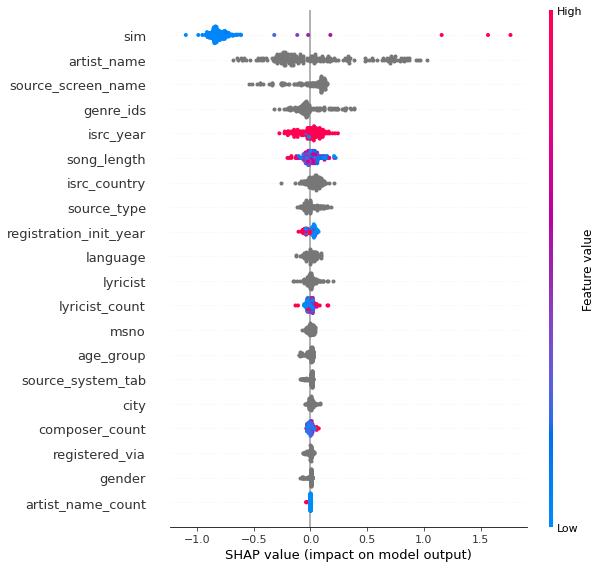

In [16]:
shap_class.show_shap_values()